Виктория Карпейкина, Юлия Щучкина, Максим Бочаров

Тема проекта: "Классификация криптовалют на основе их рыночных показателей".

****Категориальные данные****

В рамках нашего проекта мы обучаем модель на основе числовых рыночных показателей криптовалют:
- Доходность
- Value at Risk (VaR)
- Волатильность
- Коэффициент Шарпа

Однако будет полезно посмотреть на тип рассматриваемых криптовалют (категориальный признак). По самой базовой классификации криптовалюты делятся на монеты (coin) и токены (token).

**Монеты** – это независимые криптоактивы, которые способны работать автономно от других платформ, так как они обладают собственным блокчейном, используются для совершения сделок купли продажи различных товаров, для инвестирования.

**Токены** - не обладают собственным блокчейном, им необходим посредник для совершения сделок, зачастую используются как расчетное средство внутри криптовалютных стартапов, и в проектах связанных с NFT (play-to-earn), где частой практикой является привязка токенов к каким-то более крупным монетам, таким как Ethereum. 

Мы взяли данные о типе криптовалют с сайта https://coinmarketcap.com . Они представлены в текстовом файле в том же порядке, что и столбцы в таблице с котировками.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Paired')

In [2]:
# Распечатали табличку с котировками
df = pd.read_csv('df_price.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,IOTAUSDT,...,NKNUSDT,STXUSDT,KAVAUSDT,ARPAUSDT,IOTXUSDT,RLCUSDT,CTXCUSDT,BCHUSDT,TROYUSDT,VITEUSDT
0,7200.85,130.77,13.7184,8.850,41.62,1.603,0.03348,0.19305,2.6039,0.1606,...,0.01809,0.0989,1.1364,0.01064,0.003457,0.4177,0.0640,204.44,0.006779,0.01104
1,6965.71,127.19,13.0105,8.462,39.43,1.533,0.03269,0.18750,2.4593,0.1584,...,0.01845,0.0897,1.0172,0.00985,0.003358,0.3764,0.0614,195.49,0.006475,0.01042
2,7344.96,134.35,13.6474,8.888,42.23,1.629,0.03417,0.19338,2.6396,0.1664,...,0.01820,0.0945,1.0241,0.01007,0.003410,0.4041,0.0633,222.43,0.006432,0.01123
3,7354.11,134.20,13.8092,9.077,42.78,1.642,0.03434,0.19305,2.6481,0.1734,...,0.01785,0.0944,1.0401,0.01022,0.003543,0.3981,0.0698,224.47,0.006401,0.01170
4,7358.75,135.37,14.0532,9.020,43.30,1.631,0.03460,0.19453,2.6865,0.1718,...,0.01868,0.0920,1.0310,0.01008,0.003565,0.4050,0.0668,222.79,0.006568,0.01109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,28848.20,1896.33,321.9000,10.010,83.26,2.777,0.37870,0.45820,0.9830,0.1921,...,0.10650,0.7000,0.7240,0.03957,0.023570,1.8050,0.1812,117.00,0.002933,0.01993
1222,28430.10,1870.40,321.0000,9.880,83.42,2.717,0.37600,0.44900,0.9690,0.1918,...,0.10560,0.7314,0.7260,0.04270,0.023310,1.7600,0.1802,116.10,0.002890,0.01976
1223,27668.79,1847.56,313.8000,9.130,77.71,2.575,0.36530,0.42830,0.9060,0.1803,...,0.09220,0.7410,0.7450,0.03921,0.022260,1.6750,0.1646,111.10,0.002628,0.01716
1224,27628.27,1846.52,312.1000,9.260,79.90,2.610,0.36330,0.42890,0.9190,0.1796,...,0.09530,0.6918,0.8020,0.03930,0.022290,1.5390,0.1673,122.20,0.002627,0.01745


In [3]:
# Названия криптовалют
crypt = df.columns.values.tolist()

In [4]:
# Распечатали файл с типом каждой криптовалюты
with open('type.txt', 'r') as f:
    text = f.read()
data = text.split('\n')
len(data)

68

In [5]:
# Сделали таблицу вида "крипта/тип"
df_type = pd.DataFrame()

df_type['ticker'] = crypt
df_type['type'] = data
df_type

,ticker,type
0,BTCUSDT,coin
1,ETHUSDT,coin
2,BNBUSDT,coin
3,NEOUSDT,coin
4,LTCUSDT,coin
...,...,...
63,RLCUSDT,token
64,CTXCUSDT,coin
65,BCHUSDT,coin
66,TROYUSDT,token


In [6]:
a = df_type['type'].value_counts()
a

coin     45
token    23
Name: type, dtype: int64

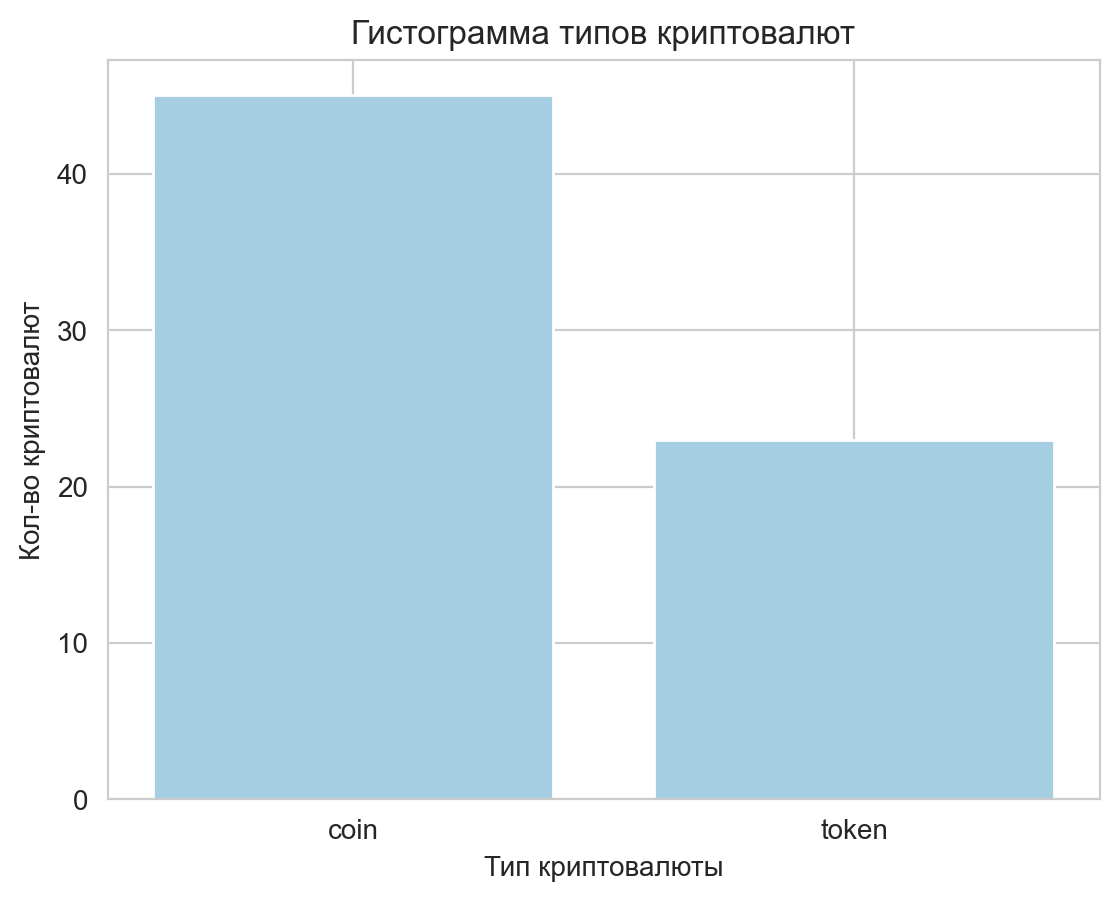

In [7]:
# Гистограмма типов криптовалют

plt.bar(a.index,a)
plt.title('Гистограмма типов криптовалют')
plt.ylabel('Кол-во криптовалют')
plt.xlabel('Тип криптовалюты');

По гистограмме видно, что среди рассматриваемых криптовалют 45 coin и 23 token.

Далее более конкретно посмотрим на coin & token. Посчитаем медианные цены для каждого типа криптовалют.

In [8]:
# Посчитали медианные цены для каждой криптовалюты
df_x = df.copy()

x = df_x.apply(lambda x: x.median(), axis=0)

In [9]:
# Добавили в таблицу к типам криптовалют
df_type['median_price'] = x.values
df_type

,ticker,type,median_price
0,BTCUSDT,coin,23791.875000
1,ETHUSDT,coin,1592.510000
2,BNBUSDT,coin,285.950000
3,NEOUSDT,coin,15.347500
4,LTCUSDT,coin,85.415000
...,...,...,...
63,RLCUSDT,token,1.381000
64,CTXCUSDT,coin,0.146500
65,BCHUSDT,coin,273.250000
66,TROYUSDT,token,0.004337


In [10]:
# Функция для подсчета медианной цены для каждого типа криптовалюты
def median_for_type(data):
  tip = df_type.loc[(df_type['type'] == f'{data}')]
  ans = tip['median_price'].median()
  return ans

In [11]:
# Считаем медианную цену для каждого типа
df_median = pd.DataFrame()
df_median['type'] = df_type['type'].unique()

y = df_median['type'].apply(median_for_type)

df_median['mean_price']=y.values
df_median

,type,mean_price
0,coin,0.41035
1,token,0.13330


Таким образом, с учетом того что, среди coin есть криптовалюты с очень высокими по сравнению с остальными ценами (например, биткоин: 23791.875000 и эфир: 1592.510000), медианные цены coin & token отличаются незначительно.